In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
Consumer_Key = "hVR5LqvEj6gVz0aFjb2ZncujD"
Consumer_Secret_Key = "M6QUpMwZwPeUPZEOlQ0Rk2xX7i3Lux0DYcu67rQhkH4U56LUlB" 
Access_Token = "1205070840666062848-b2zhxJ23q7dLAtMCn06eq4emogwUEN"
Access_Token_Secret = "YY48zF7TsKAwu57vhHEL21gp3jBbZkxtzKssWm6ttILmH"

In [ ]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [ ]:
posts = api.user_timeline(screen_name="triindonesia", count = 2000, lang = "eng", tweet_mode = "extended")

print("Show the 10 recent tweets: \n")
i=1
for tweet in posts[:10]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i=i+1

Show the 10 recent tweets: 

1) @Windoodud Malam kak Patricia, maaf ya atas kendalanya. Kakak bisa coba restart HP atau aktifkan lalu nonaktifkan mode pesawat terlebih dahulu ya. Jika masih berkendala, bisa hubungi kami kembali. Thanks ^Ane

2) Kalau ada acara keluarga, kamu yang paling gercep...

A. Bantu beres-beres
B. Bantu ngabisin makanan
C. Bantu belanja ini-itu

#IniWaktunyaKita

3) @flavchoco Sore kak Nay, maaf ya atas kendalanya. Kakak bisa coba restart HP atau aktifkan lalu nonaktifkan mode pesawat terlebih dahulu ya. Jika masih berkendala, bisa hubungi kami kembali. Thanks ^Ane

4) @amusyarbini Sore kak Amu, maaf ya. Untuk kendalanya kami butuh pengecekan lebih lanjut, yuk infoin detail kendala, nomor Tri dan nama akun Twitter ke DM kami klik https://t.co/xhsR7miGWj ketik "Ngobrol" lalu pilih angka 3 agar terhubung ke teman Triva yang bertugas. Thanks ^Ane

5) @07anasss Sore kak Anas. Kakak bisa menukarkan poin BonsTri melalui bima+ lalu klik "Tukar Point" pilih paket atau p

In [ ]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,"@Windoodud Malam kak Patricia, maaf ya atas ke..."
1,"Kalau ada acara keluarga, kamu yang paling ger..."
2,"@flavchoco Sore kak Nay, maaf ya atas kendalan..."
3,"@amusyarbini Sore kak Amu, maaf ya. Untuk kend..."
4,@07anasss Sore kak Anas. Kakak bisa menukarkan...


In [ ]:
def cleanTxt(text):
  text = re.sub('@[A-Za-z0-9]+', '', text)
  text = re.sub('#', '', text)
  text = re.sub('RT[\s]+', '', text)
  text = re.sub('https?:\/\/\S+', '', text)

  return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)

df

,Tweets
0,"Malam kak Patricia, maaf ya atas kendalanya. ..."
1,"Kalau ada acara keluarga, kamu yang paling ger..."
2,"Sore kak Nay, maaf ya atas kendalanya. Kakak ..."
3,"Sore kak Amu, maaf ya. Untuk kendalanya kami ..."
4,Sore kak Anas. Kakak bisa menukarkan poin Bon...
...,...
195,"Pagi kak, maaf banget jaringan Trinya. Kami s..."
196,"Pagi kak, maaf banget ya. Kami sarankan bisa ..."
197,"Malam kak, maaf banget ya. Saran kami bisa co..."
198,"_YK Malam kak, maaf jadi gak nyaman. SMS promo..."


In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,"Malam kak Patricia, maaf ya atas kendalanya. ...",0.200000,0.200000
1,"Kalau ada acara keluarga, kamu yang paling ger...",0.000000,0.000000
2,"Sore kak Nay, maaf ya atas kendalanya. Kakak ...",0.200000,0.200000
3,"Sore kak Amu, maaf ya. Untuk kendalanya kami ...",0.200000,0.200000
4,Sore kak Anas. Kakak bisa menukarkan poin Bon...,0.000000,0.000000
...,...,...,...
195,"Pagi kak, maaf banget jaringan Trinya. Kami s...",0.600000,0.100000
196,"Pagi kak, maaf banget ya. Kami sarankan bisa ...",0.733333,0.233333
197,"Malam kak, maaf banget ya. Saran kami bisa co...",0.733333,0.233333
198,"_YK Malam kak, maaf jadi gak nyaman. SMS promo...",0.200000,0.200000


<function matplotlib.pyplot.show(*args, **kw)>

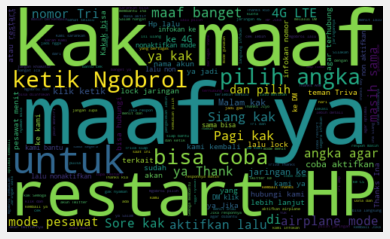

In [ ]:
allwords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=10, max_font_size=110).generate(allwords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show

In [ ]:
def getAnalysis(score):

  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,"Malam kak Patricia, maaf ya atas kendalanya. ...",0.200000,0.200000,Positive
1,"Kalau ada acara keluarga, kamu yang paling ger...",0.000000,0.000000,Neutral
2,"Sore kak Nay, maaf ya atas kendalanya. Kakak ...",0.200000,0.200000,Positive
3,"Sore kak Amu, maaf ya. Untuk kendalanya kami ...",0.200000,0.200000,Positive
4,Sore kak Anas. Kakak bisa menukarkan poin Bon...,0.000000,0.000000,Neutral
...,...,...,...,...
195,"Pagi kak, maaf banget jaringan Trinya. Kami s...",0.600000,0.100000,Positive
196,"Pagi kak, maaf banget ya. Kami sarankan bisa ...",0.733333,0.233333,Positive
197,"Malam kak, maaf banget ya. Saran kami bisa co...",0.733333,0.233333,Positive
198,"_YK Malam kak, maaf jadi gak nyaman. SMS promo...",0.200000,0.200000,Positive


In [ ]:
print('Printing negative tweets:\n')
j=i
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for i in range(0,sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

11) Punya poin BonsTri melimpah, tapi bingung mau ditukar apa lagi?

Bikin liburan kamu anti boring aja, Gaes! Tukar 1 poin BonsTri kamu dengan berbagai voucher hiburan dan game favorit.

Redeem sekarang hingga 31 Desember 2022

Klik: 

IniWaktunyaKita 

12) Punya poin BonsTri melimpah, tapi bingung mau ditukar apa lagi?

Bikin liburan kamu anti boring aja, Gaes! Tukar 1 poin BonsTri kamu dengan berbagai voucher hiburan dan game favorit.

Redeem sekarang hingga 31 Desember 2022

Klik: 

IniWaktunyaKita 

13)  Malam kak Chandra, duh maaf ya :( Triva siap bantu terkait kendala paketnya, yuk hubungi kami dengan infokan nomor Tri &amp; nama akun twitter melalui DM klik  ketik "Ngobrol" dan pilih angka 3 agar dapat terhubung dengan Teman Triva. Thanks ^Ria



In [ ]:
print('Printing positive tweets:\n')
j=i
sortedDF = df.sort_values(by=['Polarity'],ascending=True)
for i in range(0,sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing positive tweets:

199)  Malam kak Patricia, maaf ya atas kendalanya. Kakak bisa coba restart HP atau aktifkan lalu nonaktifkan mode pesawat terlebih dahulu ya. Jika masih berkendala, bisa hubungi kami kembali. Thanks ^Ane

200)  Sore kak Nay, maaf ya atas kendalanya. Kakak bisa coba restart HP atau aktifkan lalu nonaktifkan mode pesawat terlebih dahulu ya. Jika masih berkendala, bisa hubungi kami kembali. Thanks ^Ane

201)  Sore kak Amu, maaf ya. Untuk kendalanya kami butuh pengecekan lebih lanjut, yuk infoin detail kendala, nomor Tri dan nama akun Twitter ke DM kami klik  ketik "Ngobrol" lalu pilih angka 3 agar terhubung ke teman Triva yang bertugas. Thanks ^Ane

202) _sherlee Sore kak Sherly, kami infokan 365 hari batas maksimal masa aktif. Jika masa aktif kakak lebih dari 365 hari, maka ketika isi pulsa tidak akan bertambah. Jika nantinya memasuki masa tenggang, silakan isi pulsa/paket masa aktif AON agar bisa bertambah ya. Thanks ^Ane

203)  Sore kak, maaf banget ya. Untuk

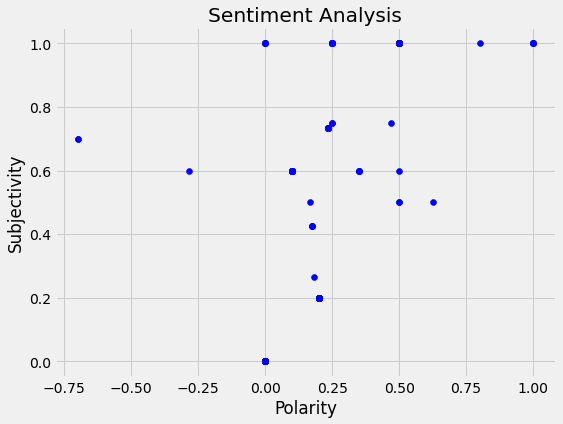

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

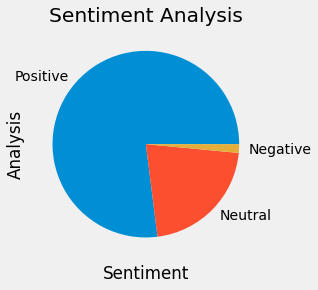

In [ ]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='pie')
plt.show()

In [ ]:
df['Analysis'].value_counts()

Positive    154
Neutral      43
Negative      3
Name: Analysis, dtype: int64